In [1]:
import os, sys, re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os.path import join, exists

In [2]:
def average_df(df):
    exp_list = get_expname_and_number(list(df["expname"]))
    categories = ["accuracy_3s", "accuracy_10s", "accuracy_30s",
                     "c_primary_3s", "c_primary_10s", "c_primary_30s"]
    avg_categories = get_mean_std_category_list(categories)
    df_results = pd.DataFrame(columns=["expname", "length"] + avg_categories)
    for i, exps in enumerate(exp_list):
        expname = exps[0]
        length = get_length_from_expname(expname)
        df_results.loc[i] = [expname, length ,-1, -1, -1, -1, -1, -1, 
                             -1, -1, -1, -1, -1, -1]
        for category in categories:
            indices = []
            for exp in exps:
                idx = df[df["expname"] == exp].index[0]
                indices.append(idx)
            vals = list(df[category].loc[indices])
            vals = list(extract_nums(vals))
            mean = np.mean(vals)
            std = np.std(vals)
            df_results["mean_" + category].loc[i] = mean
            df_results["std_" + category].loc[i] = std
    df_results = df_results.sort_values("length")
    df_results = df_results.reset_index(drop=True)
    return df_results
            
def extract_nums(vals):
    for item in vals:
        try:
            yield float(item)
        except ValueError:
            pass
        
def get_length_from_expname(expname):
    if expname[-2] == "_":
        string = expname[:-2]
    else:
        string = expname
    return [int(s) for s in string.split("_") if s.isdigit()][0]
        
def get_mean_std_category_list(categories):
    list_out = []
    for cat in categories:
        list_out.append("mean_" + cat)
        list_out.append("std_" + cat)
    return list_out
    
def get_expname_and_number(expnames):
    exp_list = []
    found_names = []
    counts = []
    for exp in expnames:
        if exp[-2] == "_":
            name = exp[:-2]
        else:
            name = exp
        if name not in found_names:
            found_names.append(name)
            counts.append(1)
        else:
            idx = found_names.index(name)
            counts[idx] += 1
    for idx, name in enumerate(found_names):
        count = counts[idx]
        name_list = [name]
        if count > 1:
            for i in range(2, count + 1):
                new_name = name + "_" + str(i)
                name_list.append(new_name)
        exp_list.append(name_list)
    return exp_list

da_summary = pd.read_csv(join(os.getcwd(), "results", "da_summary.csv"))

baseline_results = da_summary[da_summary["baseline"] == True]
avg_baseline = average_df(baseline_results)
avg_baseline = avg_baseline.sort_values("length")

rirs_results = da_summary[(da_summary.rirs == True) 
                          & (da_summary.speed_augmentation == False) 
                          & (da_summary.clean == False)]
rirs_results = rirs_results.reset_index(drop=True)
avg_rirs = average_df(rirs_results)

rirs_clean_results = da_summary[(da_summary.rirs == True) 
                          & (da_summary.speed_augmentation == False) 
                          & (da_summary.clean == True)]
rirs_clean_results = rirs_clean_results.reset_index(drop=True)
avg_rirs_clean = average_df(rirs_clean_results)

aug_results = da_summary[(da_summary.rirs == False) 
                          & (da_summary.speed_augmentation == True) 
                          & (da_summary.clean == False)]
aug_results = aug_results.reset_index(drop=True)
avg_aug = average_df(aug_results)

aug_clean_results = da_summary[(da_summary.rirs == False) 
                          & (da_summary.speed_augmentation == True) 
                          & (da_summary.clean == True)]
aug_clean_results = aug_clean_results.reset_index(drop=True)
avg_aug_clean = average_df(aug_clean_results)

aug_rirs_results = da_summary[(da_summary.rirs == True) 
                          & (da_summary.speed_augmentation == True) 
                          & (da_summary.clean == False)]
aug_rirs_results = aug_rirs_results.reset_index(drop=True)
avg_aug_rirs = average_df(aug_rirs_results)

aug_rirs_clean_results = da_summary[(da_summary.rirs == True) 
                          & (da_summary.speed_augmentation == True) 
                          & (da_summary.clean == True)]
aug_rirs_clean_results = aug_rirs_clean_results.reset_index(drop=True)
avg_aug_rirs_clean = average_df(aug_rirs_clean_results)

/home/paul/miniconda3/envs/lid/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
avg_aug_rirs

,expname,length,mean_accuracy_3s,std_accuracy_3s,mean_accuracy_10s,std_accuracy_10s,mean_accuracy_30s,std_accuracy_30s,mean_c_primary_3s,std_c_primary_3s,mean_c_primary_10s,std_c_primary_10s,mean_c_primary_30s,std_c_primary_30s
0,da_aug_rirs_tr_500,500,0.5435,0.0065,0.686,0.006000,0.721,0.003,0.6015,0.0055,0.4275,0.003500,0.405,0.002
1,da_aug_rirs_tr_1000,1000,0.644,0.002,0.773,0.000000,0.8065,0.0025,0.4655,0.0025,0.305,0.000000,0.28,0.005
2,da_aug_rirs_tr_5000,5000,0.79,0.0129945,0.889571,0.008415,0.907429,0.00761309,0.276571,0.0164478,0.149714,0.009808,0.136286,0.00882714
3,da_aug_rirs_tr_10000,10000,0.821,0,0.912,0.000000,0.9295,0.0005,0.236,0,0.119,0.000000,0.106,0


In [6]:
avg_aug_rirs_clean

,expname,length,mean_accuracy_3s,std_accuracy_3s,mean_accuracy_10s,std_accuracy_10s,mean_accuracy_30s,std_accuracy_30s,mean_c_primary_3s,std_c_primary_3s,mean_c_primary_10s,std_c_primary_10s,mean_c_primary_30s,std_c_primary_30s
0,da_aug_rirs_clean_tr_500,500,0.59,0,0.718,0.002,0.749,0.003,0.54,0,0.38,0.001,0.3585,0.0035
1,da_aug_rirs_clean_tr_1000,1000,0.654,0,0.771,0,0.799,0,0.455,0,0.309,0,0.289,0
2,da_aug_rirs_clean_tr_5000,5000,0.728333,0.00169967,0.841333,0.00329983,0.862333,0.00329983,0.359667,0.000942809,0.217,0.00244949,0.201667,0.0020548
3,da_aug_rirs_clean_tr_10000,10000,0.737,0,0.849,0,0.872,0,0.347,0,0.203,0,0.186,0


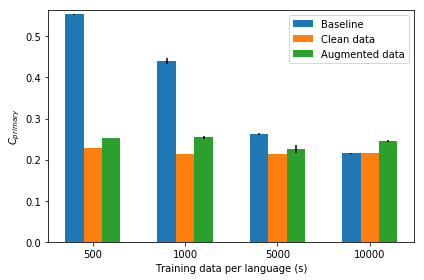

In [12]:
def plot_compare(augmented_df, clean_df, baseline_df, time, category, savename=None, 
                 aug_label="Augmented data", cmap=None):
    assert len(augmented_df) > 0, "Augmented dataframe is empty"
    assert len(clean_df) > 0, "Clean dataframe is empty"
    assert len(baseline_df) > 0, "Baseline dataframe is empty"
    assert len(augmented_df) == len(clean_df) and len(baseline_df) == len(clean_df), "Dataframe lengths do not match"
    mean_str = "mean_" + category + "_" + str(time) + "s"
    std_str = "std_" + category + "_" + str(time) + "s"
    aug_data = list(augmented_df[mean_str])
    clean_data = list(clean_df[mean_str])
    baseline_data = list(baseline_df[mean_str])
    aug_errs = list(augmented_df[std_str])
    clean_errs = list(clean_df[std_str])
    baseline_errs = list(baseline_df[std_str])
    
    min_data = min([min(aug_data), min(clean_data), min(baseline_data)])
    max_data = max([max(aug_data), max(clean_data), max(baseline_data)])
    bottom_padding = min_data * 0.05
    top_padding = max_data * 0.02
    
    bar_width = 0.2
    r1 = np.arange(len(baseline_data))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    plt.bar(r1, baseline_data, yerr=baseline_errs, width=bar_width, label="Baseline")
    plt.bar(r2, clean_data, yerr=clean_errs, width=bar_width, label="Clean data")
    plt.bar(r3, aug_data, yerr=aug_errs, width=bar_width, label=aug_label)
    
    if category == "accuracy":
        plt.ylim((min_data - bottom_padding, max_data + top_padding))
        plt.legend(loc="lower right")
    else:
        plt.ylim((0, max_data + top_padding))
        plt.legend(loc="upper right")
        
    plt.xlabel("Training data per language (s)")
    plt.ylabel(convert_category_to_label(category))
    
    x_tick_labels = ["500", "1000", "5000", "10000"]
    plt.xticks(r2, x_tick_labels)
    
    plt.tight_layout()
    if savename is not None:
        plt.savefig(savename + ".pdf", bbox_inches="tight")
    
def convert_category_to_label(category):
    if category == "accuracy":
        return "Accuracy"
    elif category == "c_primary":
        return "$C_{primary}$"
    
plot_compare(avg_rirs, avg_rirs_clean, avg_baseline, 30, "c_primary")